## Problem Statement

Typically a house in Manhattan comprises of various electrical appliances. Each of these appliances partly contributes to the total energy consumption of the house. If these houses are grouped based on their power usage, it helps to analyze the requirement of electric power in different parts of the city. Also, the insights can be useful to identify the appliances with high and low usage of electricity. In this case study, we consider the power consumption due to various appliances in the house and try to group the houses as per their power consumption.

### Data Definition

The dataset represents the electric power consumption in the house. The data definition is as follows:

Global_active_power: The global minute-averaged active power of the house (in KW)

Global_reactive_power: The global minute-averaged reactive power of the house (in KW)

Voltage: The minute-averaged voltage of the house (in volt)

Global_intensity: The global minute-averaged current intensity of the house (in ampere)

Kitchen_consumption: The power consumption of the appliances in the kitchen (in watt-hour)

Laundry_consumption: The power consumption of the appliances in the laundry room (in watt-hour)

Other_appliances_consumption: The power consumption of the appliances other than in the kitchen and laundry room (in watt-hour)

In [1]:
# Load the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import linkage,dendrogram,cophenet

np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
data= pd.read_excel('power.xlsx')

In [4]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17
...,...,...,...,...,...,...,...
21235,2.812,0.290,239.05,11.8,2,2,17
21236,2.758,0.290,238.61,11.6,1,1,18
21237,2.750,0.286,238.07,11.6,2,1,17
21238,2.918,0.268,237.10,12.4,1,1,18


In [5]:
data.isnull().sum()

Global_active_power             0
Global_reactive_power           0
Voltage                         0
Global_intensity                0
Kitchen_consumption             0
Laundry_consumption             0
Other_appliances_consumption    0
dtype: int64

In [6]:
# checking for the distribution

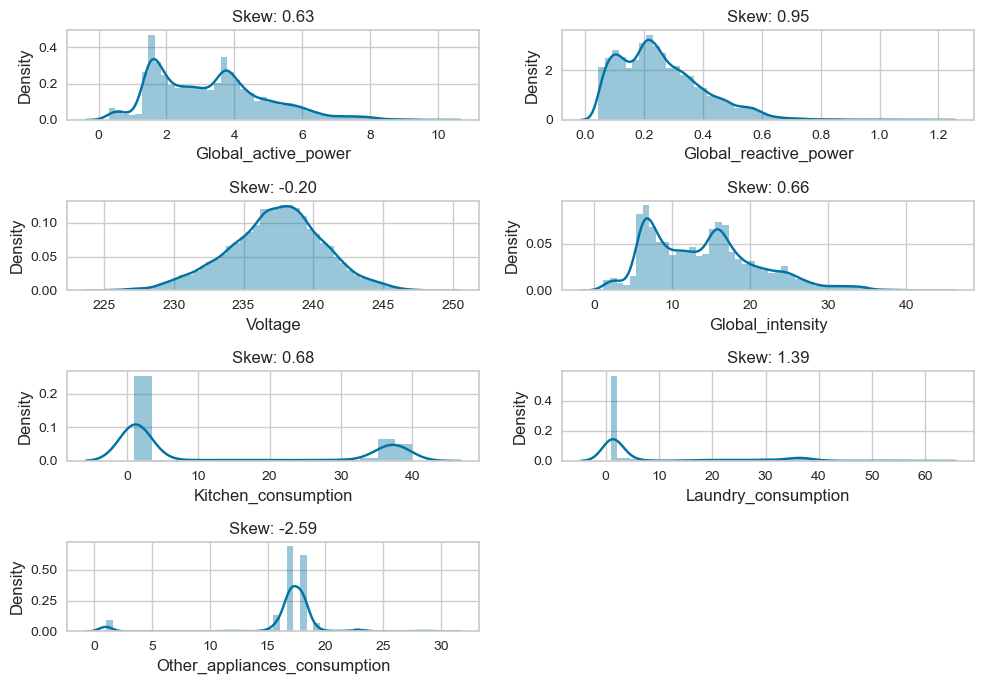

In [7]:
t=1
plt.figure(figsize=(10,7))
for i in data.columns:
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    plt.title('Skew: %.2f'%data[i].skew())
    t+=1
plt.tight_layout()
plt.show()

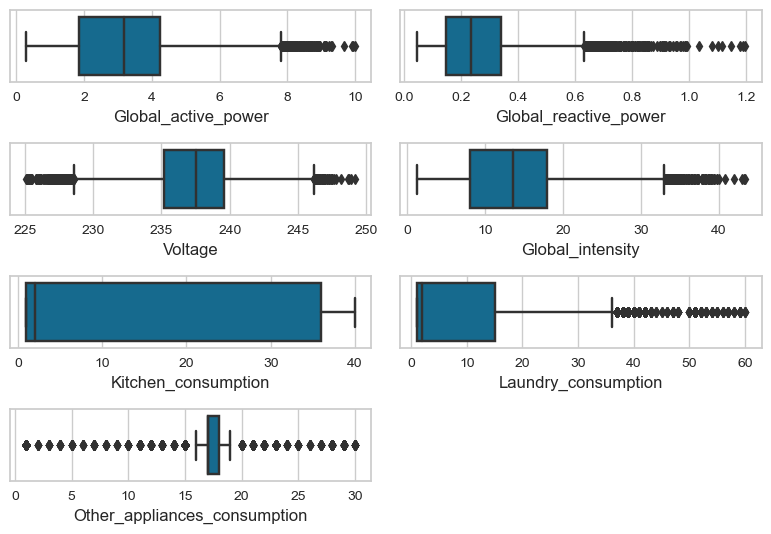

In [8]:
t=1
for i in data.columns:
    plt.subplot(4,2,t)
    sns.boxplot(x=data[i])
    t+=1
    
plt.tight_layout()
plt.show()

In [9]:
# As the data contains the outliers so we need to remove the outliers from the data.

# We use the IQR method to remove the outliers.

In [10]:
for i in data.columns:
    q1,q3= np.quantile(data[i],[0.25,0.75])
    iqr= q3-q1
    ul= q3+(3.5*iqr)
    ll= q1-(3.5*iqr)
    data=data[~((data[i]>ul) | (data[i]<ll))]
    

In [11]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17
...,...,...,...,...,...,...,...
21235,2.812,0.290,239.05,11.8,2,2,17
21236,2.758,0.290,238.61,11.6,1,1,18
21237,2.750,0.286,238.07,11.6,2,1,17
21238,2.918,0.268,237.10,12.4,1,1,18


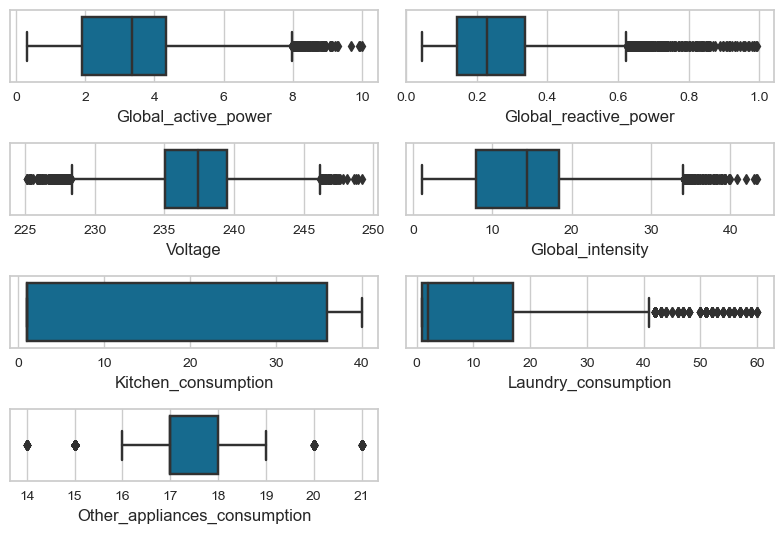

In [12]:
t=1
for i in data.columns:
    plt.subplot(4,2,t)
    sns.boxplot(x=data[i])
    t+=1
    
plt.tight_layout()
plt.show()

In [13]:
# As we can see that the no.of rows reduced that means the outliers have been removed.

### Data Scaling

In [14]:
# As the data is not in the same scale so we can go ahead and scaled the data.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc= StandardScaler()

data_s= sc.fit_transform(data)

data_s= pd.DataFrame(data_s, columns=data.columns)

In [17]:
data_s

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,-0.698943,-0.647540,0.030626,-0.627039,-0.739936,-0.177339,-0.488457
1,0.206905,0.294507,-0.602426,0.203296,-0.678724,1.859146,-0.488457
2,-0.102019,0.350749,-0.358498,-0.025762,-0.739936,1.204561,-0.488457
3,0.194597,0.182024,-0.599522,0.174663,-0.739936,1.859146,-0.488457
4,-0.106942,0.266386,-0.332363,-0.054394,-0.739936,1.277293,-0.488457
...,...,...,...,...,...,...,...
19070,-0.348173,0.252326,0.530099,-0.369349,-0.678724,-0.540997,-0.488457
19071,-0.381404,0.252326,0.402327,-0.397981,-0.739936,-0.613729,0.736861
19072,-0.386327,0.224205,0.245516,-0.397981,-0.678724,-0.613729,-0.488457
19073,-0.282942,0.097661,-0.036164,-0.283452,-0.739936,-0.613729,0.736861


In [18]:
# Lets apply PCA on the data set.

In [19]:
pca= PCA(n_components=7)

In [20]:
pca.fit(data_s)

PCA(n_components=7)

In [21]:
# Now we will check the contribution of each column in the pca 

In [22]:
pca.explained_variance_

array([3.36179439, 1.10833967, 1.07530084, 0.91400655, 0.36966714,
       0.17067116, 0.00058725])

In [23]:
pca.explained_variance_ratio_.cumsum()

array([0.48023116, 0.6385571 , 0.79216345, 0.92272897, 0.9755358 ,
       0.99991611, 1.        ])

In [24]:
# Now lets plot the explained variance.

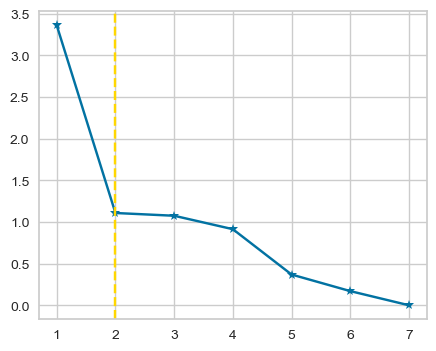

In [25]:
plt.figure(figsize=(5,4))
plt.plot(range(1,8), pca.explained_variance_, marker='*')
plt.axvline(x=2, ls='--', color= 'gold')
plt.show()

In [26]:
# As per the graph we can see that there is gradual decrease till x=2 hence we can consider n_components=2.

In [27]:
pca= PCA(n_components=2)

In [28]:
data_pca= pca.fit_transform(data_s)

In [29]:
data_pca= pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

In [30]:
data_pca

,PC1,PC2
0,-0.935413,-1.038198
1,0.971937,-0.388768
2,0.370262,-0.462506
3,0.918359,-0.448081
4,0.358869,-0.478836
...,...,...
19070,-0.832946,-0.385916
19071,-1.200943,0.390391
19072,-0.782718,-0.550625
19073,-0.933396,0.183545


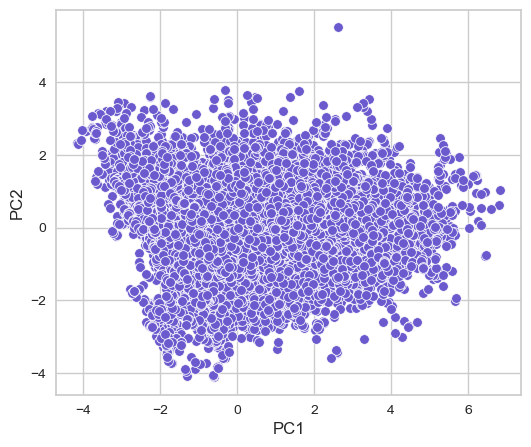

In [31]:
plt.figure(figsize=(6,5))
sns.scatterplot(x= data_pca['PC1'], y=data_pca['PC2'], color='slateblue')
plt.show()

### K- Means clustering

In [32]:
n_cluster= list(range(2,10))

In [33]:
wcss=[]
sil=[]

for i in n_cluster:
    model= KMeans(n_clusters=i)
    model.fit(data_pca)
    pred=model.predict(data_pca)
    wcss.append(model.inertia_)
    sil.append(silhouette_score(data_pca, pred))

In [34]:
pd.DataFrame({'WCSS': wcss, 'Sil Score': sil}, index=n_cluster)

,WCSS,Sil Score
2,41000.157272,0.449812
3,29993.898474,0.387891
4,21834.901786,0.396880
5,17302.245028,0.391829
6,15335.380631,0.381492
7,13475.389731,0.386724
8,11623.837032,0.368900
9,10521.256453,0.364656


In [35]:
# Now plot the K Elbow Visualizer to visualize the data.

In [36]:
k_elbow= KElbowVisualizer(KMeans(), k=12)

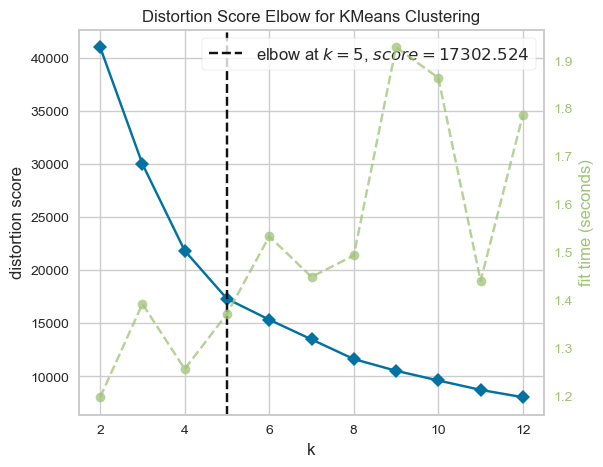

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
plt.figure(figsize=(6,5))
k_elbow.fit(data_pca)
k_elbow.show()

In [38]:
# Now lets check the optimum number of cluster using Silhouete Visualizer.

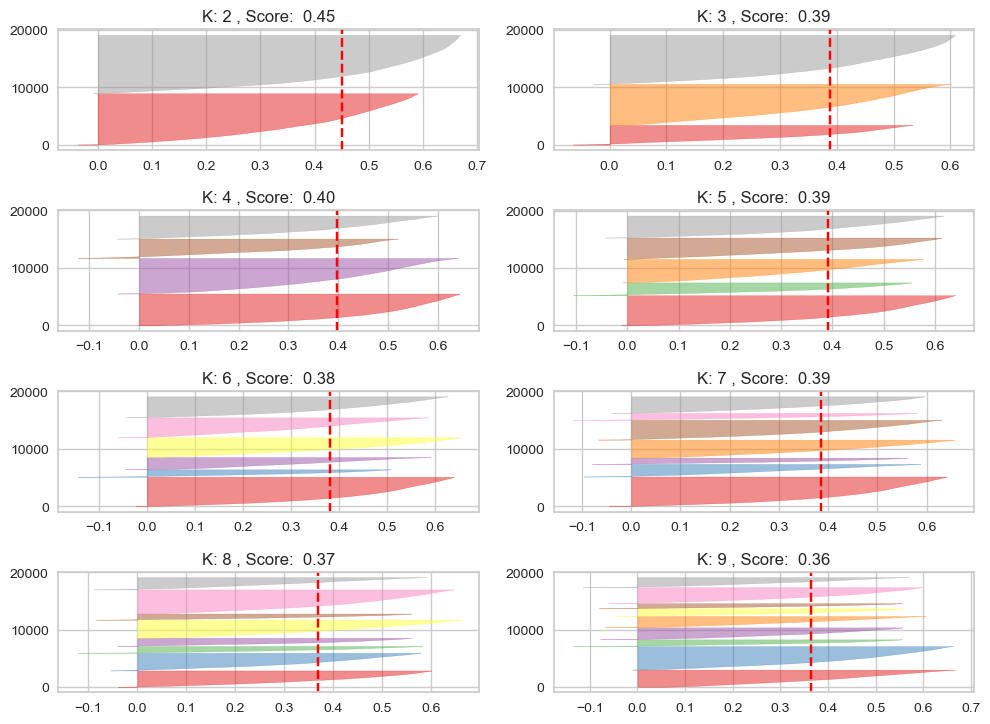

In [39]:
t= 1
plt.figure(figsize=(10,9))
for i in n_cluster:
    plt.subplot(5,2,t)
    model= KMeans(n_clusters=i)
    sil_viz= SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title('K: %s , Score: % .2f' %(i, sil_viz.silhouette_score_))
    t+=1
    
plt.tight_layout()
plt.show()

In [40]:
# Lets go with k=3 for the final model.

In [41]:
final_model= KMeans(n_clusters=3)

In [42]:
final_model.fit(data_pca)

KMeans(n_clusters=3)

In [43]:
y_pred_kmeans= final_model.predict(data_pca)

In [44]:
centroids= final_model.cluster_centers_

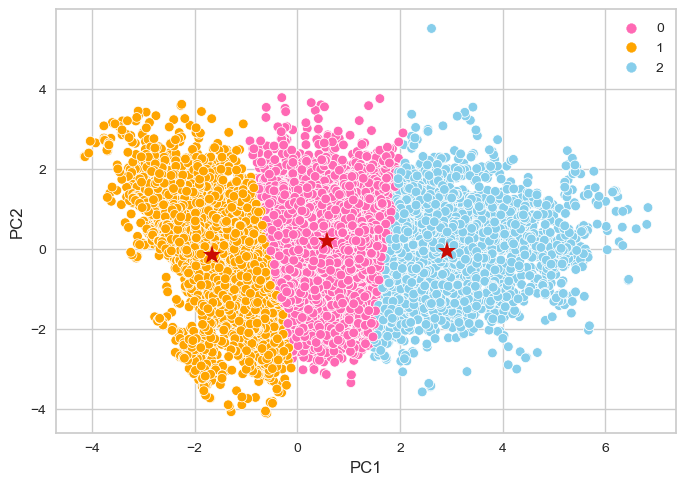

In [45]:
sns.scatterplot(x= data_pca['PC1'], y=data_pca['PC2'], hue= y_pred_kmeans, palette=['hotpink','orange','skyblue'])

for i in range(3):
    plt.plot(centroids[i][0], centroids[i][1], marker='*', ms='14', color='r')

In [46]:
data['K_Label']= y_pred_kmeans

In [47]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,K_Label
0,2.242,0.162,237.33,10.0,1,7,17,1
1,3.714,0.296,235.15,15.8,2,35,17,0
2,3.212,0.304,235.99,14.2,1,26,17,0
3,3.694,0.280,235.16,15.6,1,35,17,0
4,3.204,0.292,236.08,14.0,1,27,17,0
...,...,...,...,...,...,...,...,...
21235,2.812,0.290,239.05,11.8,2,2,17,1
21236,2.758,0.290,238.61,11.6,1,1,18,1
21237,2.750,0.286,238.07,11.6,2,1,17,1
21238,2.918,0.268,237.10,12.4,1,1,18,1


In [48]:
data.groupby(by='K_Label').mean()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
K_Label,,,,,,,
0,3.915029,0.262017,236.848675,16.631480,20.208228,11.044931,17.370402
1,1.945220,0.235848,239.141413,8.218414,1.643786,2.233337,17.686424
2,5.837816,0.283254,233.217649,25.084192,26.843384,24.094555,16.738290


In [49]:
data['Power_consumption']= data['K_Label'].map({0:'Low', 1: 'High', 2:'Avg'})

In [50]:
data['Total_Power_Consumption']= data['Kitchen_consumption']+ data['Laundry_consumption']+data['Other_appliances_consumption']

In [51]:
data.drop('K_Label', axis=1, inplace=True)

In [52]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Power_consumption,Total_Power_Consumption
0,2.242,0.162,237.33,10.0,1,7,17,High,25
1,3.714,0.296,235.15,15.8,2,35,17,Low,54
2,3.212,0.304,235.99,14.2,1,26,17,Low,44
3,3.694,0.280,235.16,15.6,1,35,17,Low,53
4,3.204,0.292,236.08,14.0,1,27,17,Low,45
...,...,...,...,...,...,...,...,...,...
21235,2.812,0.290,239.05,11.8,2,2,17,High,21
21236,2.758,0.290,238.61,11.6,1,1,18,High,20
21237,2.750,0.286,238.07,11.6,2,1,17,High,20
21238,2.918,0.268,237.10,12.4,1,1,18,High,20


In [53]:
# Draw the plot for the data.

<Axes: xlabel='Global_active_power', ylabel='Total_Power_Consumption'>

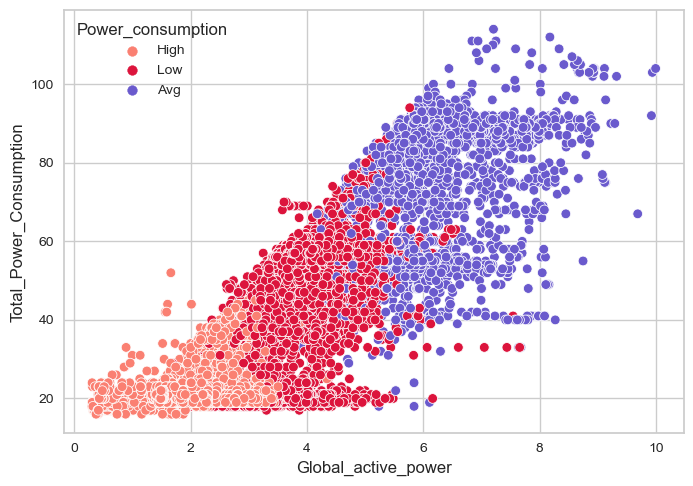

In [54]:
sns.scatterplot(x= data['Global_active_power'],y=data['Total_Power_Consumption'],
               hue=data['Power_consumption'],palette=['salmon','crimson','slateblue'])